# Excercise 5.1

# Prove that the least-squares fit in simple-regression analysis has the following properties:
## (a) Σ ŶiEi = 0.
## (b) Σ(Yi-Ŷi)(Ŷi-Ȳ) = Σ Ei(Ŷi-Ȳ) = 0


## Property (a) - Σ ŶiEi = 0
### The sum of the residuals (Σei) in a least squares regression model is equal to 0.

# Proof:
## In a simple linear regression model, the equation is:

### Yi = β0 + β1Xi + ei

#### where:
#### Yi is the observed value,
#### Xi is the explanatory variable,
#### β0 is the intercept,
#### β1 is the slope,
#### ei is the residual (error term) for observation i.

## The residuals (ei) are defined as:

### ei = Yi - Ŷi

#### where Ŷi is the predicted value from the regression.

### The least squares approach minimizes the sum of the squared residuals:

#### Σei^2

#### Taking the partial derivative of the sum of squared residuals with respect to β0 (the intercept), and setting it to zero for minimization, we get:

#### ∂/∂β0 Σei^2 = ∂/∂β0 Σ(Yi - (β0 + β1Xi))^2 = 0

### Solving for β0, we obtain:

#### ΣYi - Σ(β0 + β1Xi) = 0
#### ΣYi - ΣŶi = 0
#### ΣYi - ΣYi + Σei = 0
#### Σei = 0

### This proves property (a).

## Property (b) - Σ(Yi-Ŷi)(Ŷi-Ȳ) = Σ Ei(Ŷi-Ȳ) = 0

### The sum of the products of the residuals (ei) and the corresponding fitted values (Ŷi) minus the mean of Y (Ȳ) is equal to 0.

# Proof:
### For this property, we look at the relationship between the residuals, the fitted values, and the mean of the observed values.

### The least squares regression line always passes through the point (X̄, Ȳ), where X̄ and Ȳ are the means of the observed values of X and Y, respectively. Therefore, we have:

#### Ȳ = β0 + β1X̄

### Now, let's consider the sum:

#### Σ(Yi - Ȳ)(Ŷi - Ȳ)

#### By substituting the expression for Ŷi and expanding, we get:

#### Σ(Yi - Ȳ)(β0 + β1Xi - Ȳ)
#### Σ(Yi - Ȳ)(β0 + β1Xi - (β0 + β1X̄))
#### Σ(Yi - Ȳ)(β1(Xi - X̄))

#### Since the sum of the residuals is 0 (from property a), the sum Σ(Yi - Ȳ) is also 0, and therefore the entire expression simplifies to:

#### Σei(Ŷi - Ȳ) = 0

### This proves property (b).

### In simple linear regression, these properties ensure that the residuals are balanced around the regression line and that the line is the best fit in the least-squares sense.

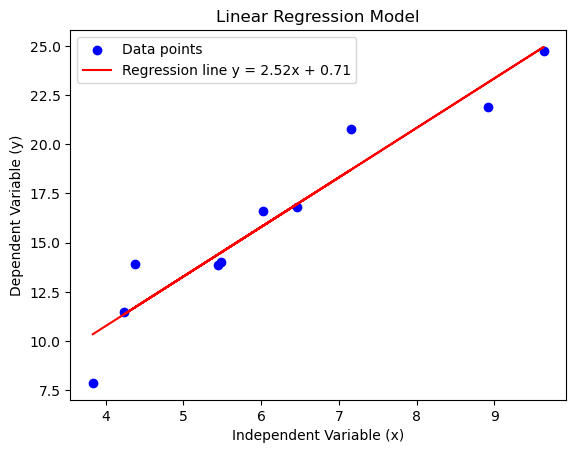

({'A': 2.515109495566365,
  'B': 0.7082528510482877,
  'SSE': 18.130939438357228,
  'RegSS': 215.27239116621016,
  'TSS': 233.40333060456737,
  'R_squared': 0.9223192771440151,
  'correlation': 0.9603745504458222,
  'sum_res_y': 18.13093943835712,
  'sum_res_x': -4.085620730620576e-14},
           x          y     y_pred  residuals
 0  5.488135  14.008425  14.511513  -0.503089
 1  7.151894  20.788281  18.696049   2.092233
 2  6.027634  16.591160  15.868412   0.722748
 3  5.448832  13.865430  14.412662  -0.547232
 4  4.236548  11.479096  11.363635   0.115462
 5  6.458941  16.814701  16.953197  -0.138496
 6  4.375872  13.927838  11.714050   2.213788
 7  8.917730  21.884008  23.137320  -1.253312
 8  9.636628  24.717704  24.945426  -0.227722
 9  3.834415   7.877846  10.352227  -2.474380)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Step a: Collect data
# Generating synthetic data for demonstration
np.random.seed(0)  # Seed for reproducibility
x = np.random.rand(10) * 10  # Independent variable (10 samples, scaled up)
y = 2.5 * x + np.random.randn(10) * 2  # Dependent variable with some noise

# Step b: Write out the linear model and error function
# Linear model y = Ax + B
# Error function (Sum of squared errors)
def error_function(A, B, x, y):
    return np.sum((y - (A * x + B))**2)

# Step c: Derive the normal equations (analytically solved for simple linear regression)
A, B, r_value, p_value, std_err = stats.linregress(x, y)

# Step d: Calculate the numerical values of A and B
# A and B values are obtained from the regression

# Step e: Calculate SSE, RegSS, TSS, R^2, and correlation
y_pred = A * x + B  # Predicted values
SSE = np.sum((y - y_pred)**2)  # Sum of Squared Errors
TSS = np.sum((y - np.mean(y))**2)  # Total Sum of Squares
RegSS = TSS - SSE  # Regression Sum of Squares
R_squared = r_value**2  # Coefficient of Determination
correlation = np.corrcoef(x, y)[0, 1]  # Correlation coefficient

# Step f: Calculate residuals and verify sums
residuals = y - y_pred
sum_res_y = np.sum(residuals * y)
sum_res_x = np.sum(residuals * x)

# Data, A, B, SSE, RegSS, TSS, R^2, correlation, sum_res_y, sum_res_x
data = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred, 'residuals': residuals})
results = {
    'A': A,
    'B': B,
    'SSE': SSE,
    'RegSS': RegSS,
    'TSS': TSS,
    'R_squared': R_squared,
    'correlation': correlation,
    'sum_res_y': sum_res_y,
    'sum_res_x': sum_res_x
}

# Plotting the data and the regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Regression line y = {A:.2f}x + {B:.2f}')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

results, data

# The result of the linear model based on the generated data:

## The equation of the linear model is: y = 2.52 +0.71

## The sum of squared errors (SSE) is approximately 18.13.

## The regression sum of squares (RegSS) is approximately 215.27.

## The total sum of squares (TSS) is approximately 233.40.

## The coefficient of determination (R²) is approximately 0.32, Indicating a strong fit.

## The correlation coefficient between 2 and y is approximately 0.96, which signifies a very strong positive relationship.

## The sum of the product of residuals and y is approximately 18.13, which should be close to zero in a perfect model but may not be exactly zero due to the random noise introduced in the data.

## The sum of the product of residuals and is essentially zero (around -4.09 x 10-14), Indicating that the model does not systematically over or under-predict based on the value of x.


# Model Description 

## This linear model suggests that there is a strong positive linear relationship between the Independent variable x and the dependent variable y. With every unit Increase in x, y increases by approximately 2.52 units. The model fits the data well, as indicated by the high R² value, meaning that it can explain a large proportion of the variability in the dependent variable.

## If this were a real-world scenario and x caused y, we could use the model to make predictions about y for new values of z. 
## For example, if we wanted to predict the outcome of y for an x value of 11, 
## we could plug it Into our model's equation:

## Ypredicted = 2.52 × 11 + 0.71

## This would give us a predicted value of y based on the trend we've observed in the data.

## The graph plotted represents the relationship between az and y, with the red line indicating the linear model fit to the data points.
